<a href="https://colab.research.google.com/github/pham156/pytorch-learning/blob/main/PyTorch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True) # mkdir: create folder
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f: # with open(): open the file
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # request.get(): get the link
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref: # unzip data
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [4]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

(-0.5, 511.5, 383.5, -0.5)

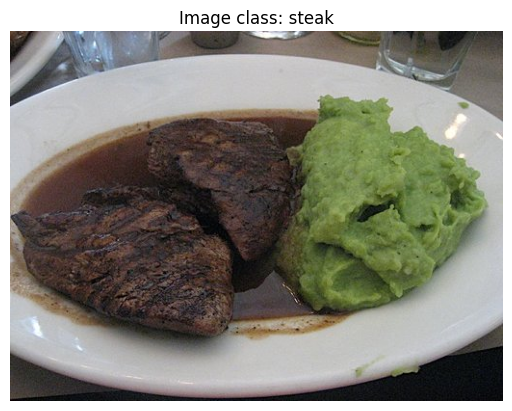

In [8]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(train_dir.glob("*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
image = Image.open(random_image_path)
plt.imshow(image)
plt.title(f"Image class: {image_class}")
plt.axis(False)

In [ ]:
# transforming data

In [12]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)), # resize to 64x64
    transforms.RandomHorizontalFlip(p=0.5), # random flip
    transforms.ToTensor() # transform to tensor
])

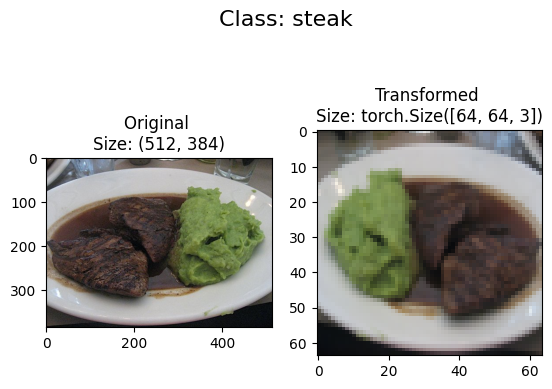

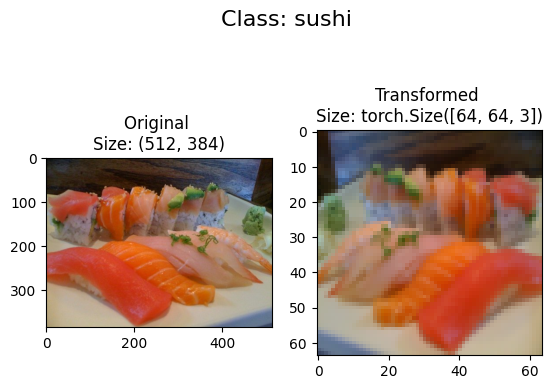

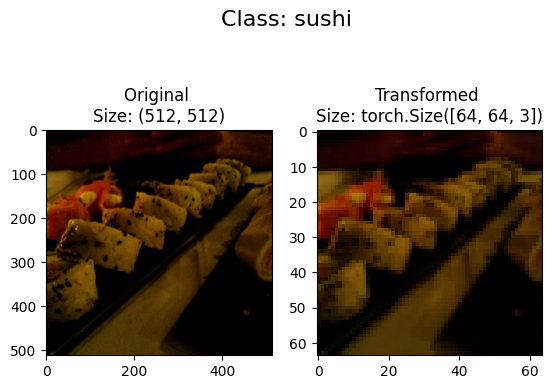

In [16]:
# visualize data
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    # open n image paths from image_paths, transform them with transform, plot them side by side
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            transformed_image = transform(f).permute(1, 2, 0)
            transformed_image_shape = transformed_image.shape
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_path_list, data_transform, n=3)

In [17]:
# Load image data using ImageFolder
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

In [18]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
class_dict = train_data.class_to_idx # class to dict
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Text(0.5, 1.0, 'pizza')

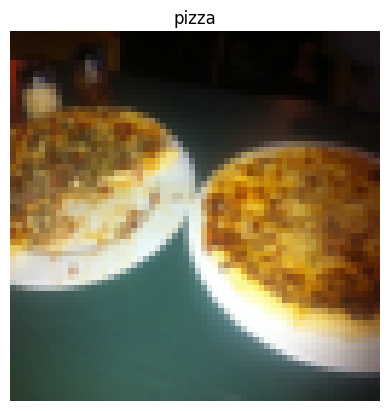

In [22]:
img.permute(1, 2, 0)
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)
plt.title(class_names[label])

In [25]:
# Option 1: turn into DataLoader -> iterable dataset
# batch_size: divide to batches
# num_workers: # subprocesses to use for data loading
# shuffle
train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, num_workers=1, shuffle=False)

In [27]:
# Option 2: custom dataset
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
target_directory = train_dir
class_names_found = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
class_names_found

['pizza', 'steak', 'sushi']

In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [32]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transforms=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        self.transforms = transforms
        self.classes, self.class_to_idx = find_classes(targ_dir)
    # open image
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    # return size
    def __len__(self) -> int:
        return len(self.paths)
    # get image
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transforms:
            return self.transforms(image), class_idx
        else:
            return image, class_idx

In [33]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [34]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transforms=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transforms=test_transform)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e788a711e70>,
 <__main__.ImageFolderCustom at 0x7e788a713f70>)

In [35]:
# display random image
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjusted = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjusted)
        if classes:
            plt.title(classes[targ_label])
        else:
            plt.title(str(targ_label))


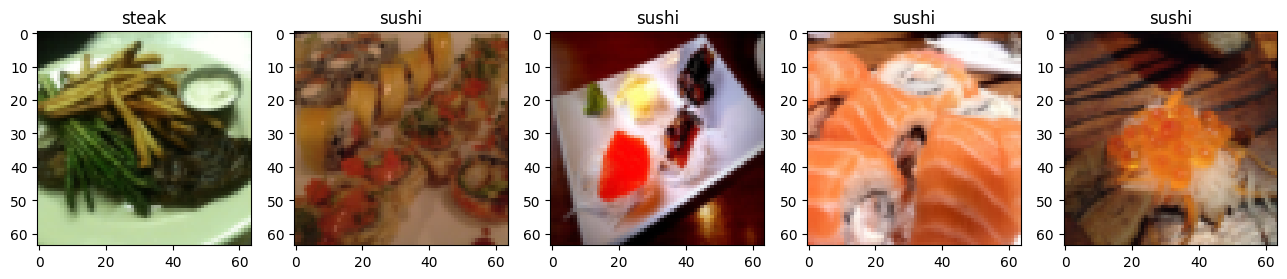

In [36]:
display_random_image(train_data_custom, n=5, classes=class_names)


In [37]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, num_workers=1, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=1, num_workers=1, shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e787e9ab520>,
 <torch.utils.data.dataloader.DataLoader at 0x7e787eb4a050>)

In [38]:
img_custom, label_custom = train_data_custom[0][0], train_data_custom[0][1]
img_custom, label_custom

(tensor([[[0.2902, 0.2627, 0.2314,  ..., 0.9882, 0.9882, 0.9882],
          [0.2471, 0.2980, 0.2275,  ..., 0.9922, 0.9882, 0.9882],
          [0.2471, 0.3098, 0.2235,  ..., 0.9922, 0.9882, 0.9882],
          ...,
          [0.1804, 0.1843, 0.1765,  ..., 0.1176, 0.1176, 0.1137],
          [0.1373, 0.1294, 0.1412,  ..., 0.1255, 0.1412, 0.1294],
          [0.1216, 0.1255, 0.1255,  ..., 0.1255, 0.1490, 0.1451]],
 
         [[0.1961, 0.1686, 0.1529,  ..., 0.9529, 0.9569, 0.9490],
          [0.1882, 0.2078, 0.1529,  ..., 0.9804, 0.9608, 0.9451],
          [0.1686, 0.2431, 0.1725,  ..., 0.9882, 0.9569, 0.9333],
          ...,
          [0.1294, 0.1451, 0.1412,  ..., 0.0392, 0.0392, 0.0431],
          [0.1020, 0.0980, 0.1020,  ..., 0.0431, 0.0471, 0.0431],
          [0.0745, 0.0706, 0.0627,  ..., 0.0431, 0.0510, 0.0510]],
 
         [[0.2510, 0.2353, 0.2078,  ..., 0.7843, 0.7882, 0.8039],
          [0.2157, 0.2196, 0.1765,  ..., 0.8706, 0.8431, 0.7922],
          [0.2196, 0.2431, 0.1725,  ...,

In [ ]:
# data augmentation
